# Assignment 2

At first, we import some necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline
#sns.set_style('whitegrid')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import warnings
warnings.filterwarnings('ignore')

## 1. Presentation and exploration of the data

In [2]:
data = pd.read_csv('hepatitis.csv',header = None)
data.columns = ['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE'\
               ,'SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER BIG        155 non-null    object
 9   LIVER FIRM       155 non-null    object
 10  SPLEEN PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ASCITES          155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

As shown, we know that there are totally 20 features and 155 patients. We may notice that some of the datatype is object. Please read the file hepatitis_info.txt, we may find that there are lots of missing values which are indicated by "?". In order to make the data set analysable, we need to clean the data at first. 

Now we begin the data cleaning. There are a lot of methods for data cleaning, for example, deleting the corresponding line, setting the missing values with the mean value, or setting them with median, k nearst neighbourhood... \
Here in order to get the minimum error, I delete all the line with missing value(s). And then we convert the data type to int64 or float64

In [4]:
data = data.replace(to_replace='?', value=np.nan)
data = data.dropna()
features = ['STEROID','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES',
         'VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME']

for i in range(15):
    data[features[i]] = pd.to_numeric(data[features[i]])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 5 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            80 non-null     int64  
 1   AGE              80 non-null     int64  
 2   SEX              80 non-null     int64  
 3   STEROID          80 non-null     int64  
 4   ANTIVIRALS       80 non-null     int64  
 5   FATIGUE          80 non-null     int64  
 6   MALAISE          80 non-null     int64  
 7   ANOREXIA         80 non-null     int64  
 8   LIVER BIG        80 non-null     int64  
 9   LIVER FIRM       80 non-null     int64  
 10  SPLEEN PALPABLE  80 non-null     int64  
 11  SPIDERS          80 non-null     int64  
 12  ASCITES          80 non-null     int64  
 13  VARICES          80 non-null     int64  
 14  BILIRUBIN        80 non-null     float64
 15  ALK PHOSPHATE    80 non-null     int64  
 16  SGOT             80 non-null     int64  
 17  ALBUMIN          

To further analyze our data, let's first plot two histograms to find out how age and sex influence the disease.

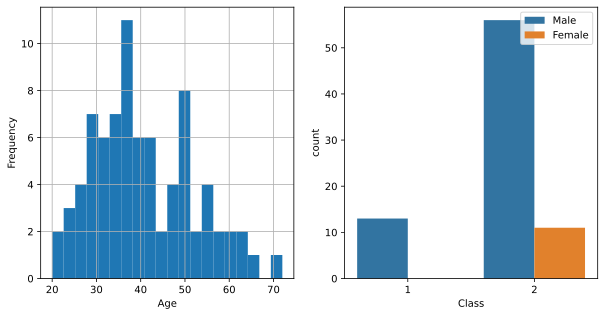

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
data["AGE"].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.countplot(x='Class',hue = 'SEX',data=data)
plt.legend(labels=["Male","Female"])

From the left plot, most patients are between 25 and 45 years old. It means that the cause of hepatitis might not be aging, but judging by age distribution, it is likely to be spread due to unsafe sex. \
From the right plot, most patients are male. This may be due to male's bad habits, such as excessive drinking, smoking and so on. Another possibility is due to genetic reasons

Next, we study the relationship between the patient’s life and death and  four substances

<AxesSubplot:xlabel='Class', ylabel='SGOT'>

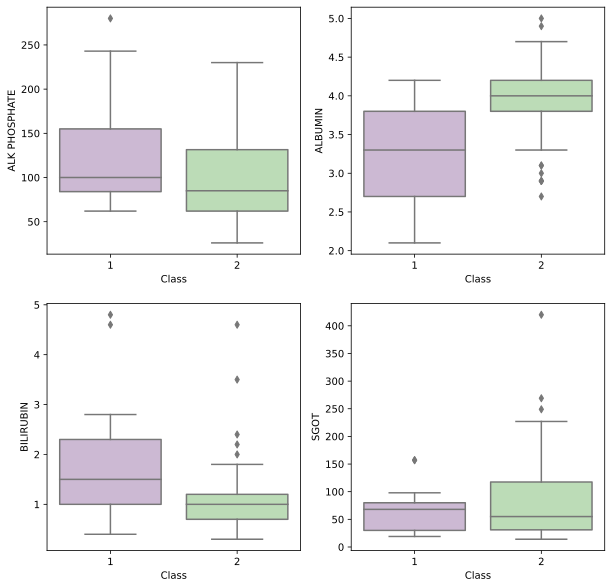

In [6]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
sns.boxplot(x = 'Class', y = 'ALK PHOSPHATE', data = data,palette = "PRGn")

plt.subplot(2,2,2)
sns.boxplot(x = 'Class', y = 'ALBUMIN', data = data,palette = "PRGn")

plt.subplot(2,2,3)
sns.boxplot(x = 'Class', y = 'BILIRUBIN', data = data,palette = "PRGn")

plt.subplot(2,2,4)
sns.boxplot(x = 'Class', y = 'SGOT', data = data,palette = "PRGn")

From the plot above, we can make a few guesses:\
1. ALK PHOSPHATE is related to patient survival, but it is not obvious. Increased ALK PHOSPHATE may cause death of the patient.
2. ALBUMIN has a clear relationship with patient survival. Lower ALK PHOSPHATE may cause death of the patient.
3. BILIRUBIN has a clear relationship with patient survival. Increased ALK PHOSPHATE may cause death of the patient.
4. SGOT has no obvious relationship with patient survival.

We try to find out the correlation between every features using heatmap

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
Class,1.000000,-0.212769,0.175876,0.123830,-0.108776,0.181151,0.275595,-0.185042,-0.194030,0.055978,0.135643,0.287839,0.479211,0.345785,-0.351557,-0.189360,0.078731,0.477404,0.395386,-0.456856
AGE,-0.212769,1.000000,-0.046265,0.016022,-0.043308,-0.111171,-0.074306,0.243440,-0.034422,-0.167090,-0.134460,-0.179086,-0.121954,-0.105793,0.160752,0.088183,-0.132269,-0.220464,-0.190169,0.310650
SEX,0.175876,-0.046265,1.000000,0.016354,-0.091777,-0.064686,0.019558,-0.035579,-0.020908,-0.129018,0.005812,-0.122360,0.167729,0.041158,-0.114092,0.064612,0.016695,0.032880,-0.022822,-0.113365
STEROID,0.123830,0.016022,0.016354,1.000000,0.058313,0.068224,0.168270,0.021031,0.191683,0.097744,-0.008016,-0.047253,0.021031,-0.132453,-0.086126,-0.028305,-0.001777,0.081408,0.069323,-0.118220
ANTIVIRALS,-0.108776,-0.043308,-0.091777,0.058313,1.000000,-0.038716,-0.008018,-0.011934,0.122253,0.058313,-0.213811,-0.218352,-0.250622,-0.225494,0.200767,0.203513,0.141556,-0.252072,0.007032,0.211362
FATIGUE,0.181151,-0.111171,-0.064686,0.068224,-0.038716,1.000000,0.583660,0.308257,0.039072,0.225663,0.151074,0.325107,0.308257,0.118864,-0.289122,-0.155995,-0.199156,0.287159,0.255138,-0.135751
MALAISE,0.275595,-0.074306,0.019558,0.168270,-0.008018,0.583660,1.000000,0.528145,-0.002608,0.065510,0.012326,0.294075,0.312576,0.087280,-0.269677,-0.213404,-0.144686,0.275820,0.230215,-0.167436
ANOREXIA,-0.185042,0.243440,-0.035579,0.021031,-0.011934,0.308257,0.528145,1.000000,0.194531,0.021031,0.067267,0.169932,0.019608,0.052926,-0.154764,-0.124711,-0.071686,-0.065713,0.036314,-0.003556
LIVER BIG,-0.194030,-0.034422,-0.020908,0.191683,0.122253,0.039072,-0.002608,0.194531,1.000000,0.463092,0.135643,0.068533,-0.090149,-0.064034,0.139327,-0.056615,0.058730,-0.149767,-0.089272,-0.043879
LIVER FIRM,0.055978,-0.167090,-0.129018,0.097744,0.058313,0.225663,0.065510,0.021031,0.463092,1.000000,0.184378,0.222765,0.021031,0.170297,-0.149444,-0.364257,-0.286035,0.251874,0.059646,-0.169067


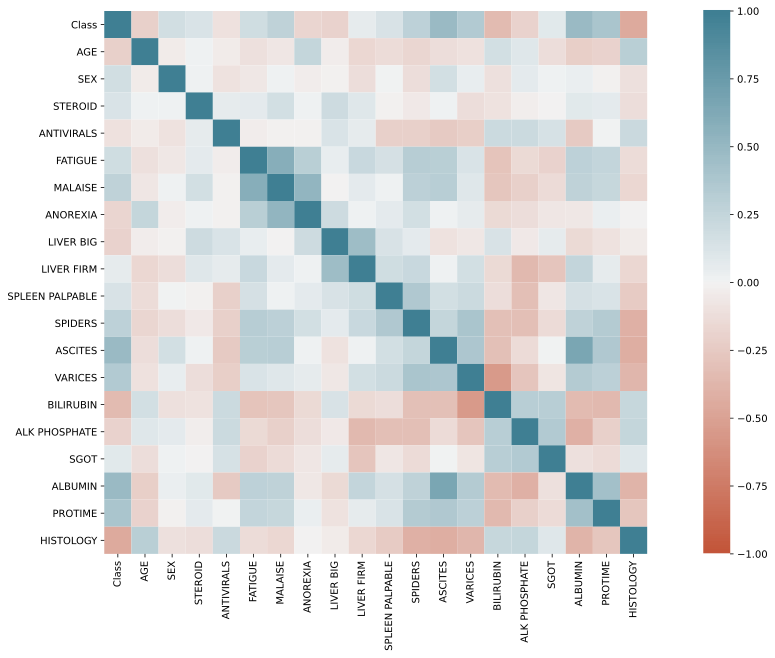

In [7]:
corr_mat=data.corr(method='pearson')


plt.figure(figsize=(20,10))
ax = sns.heatmap(
    corr_mat, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
corr_mat

In [8]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 10))

Top Absolute Correlations
ASCITES    ALBUMIN       0.649490
FATIGUE    MALAISE       0.583660
VARICES    BILIRUBIN     0.547026
MALAISE    ANOREXIA      0.528145
Class      ASCITES       0.479211
           ALBUMIN       0.477404
LIVER BIG  LIVER FIRM    0.463092
Class      HISTOLOGY     0.456856
ALBUMIN    PROTIME       0.434659
ASCITES    HISTOLOGY     0.430224
dtype: float64


ASCITES and ALBUMIN, FATIGUE and MALAISE, VARICES and BILIRUBIN, MALAISE and ANOREXIA\
These four pairs have higher correlation than others

## 2. Data splitting

According to the paper, we select 10% of the data as test data. Then we visualize the train and test data in order to observe if they have the same distribution.

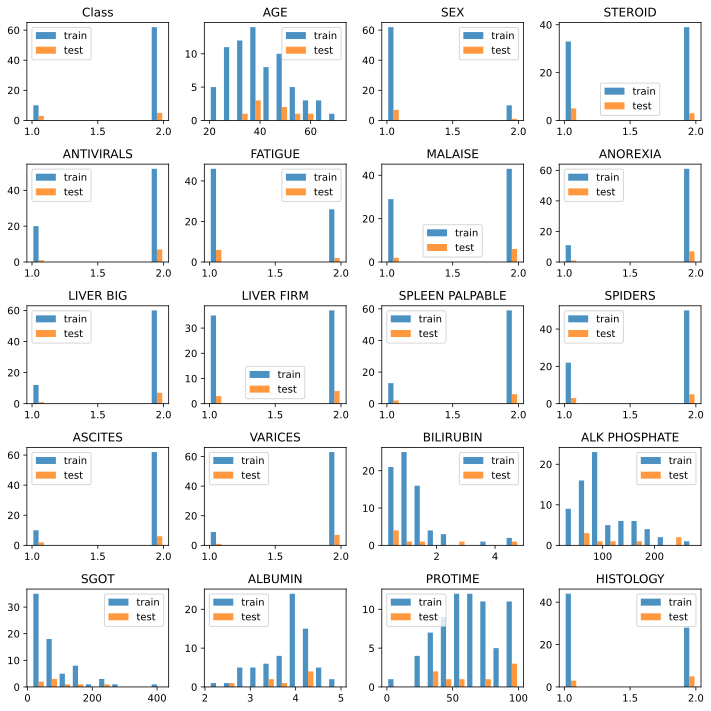

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.1,random_state=0)
plt.figure(figsize=(10, 10))
column = ['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE'\
               ,'SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
for i in range(len(column)):
    plt.subplot(5,4,i+1)
    plt.hist([train[column[i]],test[column[i]]], bins=10, alpha=0.8, label=['train','test'])
    plt.title(column[i])
    plt.legend()

plt.tight_layout()

## 3. Preprocessing

First, we are going to standardise the input features by subtracting the mean of each variable and dividing by the standard deviation. To not inject information from unseen data into our model building process, we use the means and stds from the training set also for our test set.

In [10]:
std = StandardScaler()

train_scaled = std.fit_transform(train)

test_scaled = std.transform(test)

In [11]:
#make dataframes, we need it for better visualisation

scaled_train = pd.DataFrame(train_scaled, columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE',
                            'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES',
                            'VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY'])

scaled_test = pd.DataFrame(test_scaled, columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE',
                            'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES',
                            'VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY'])

Splitting the dataset into the source variables (independant variables) and the target variable (dependant variable)

In [12]:
#create X and Y
X_train = scaled_train.iloc[:, 1:]
Y_train = train.iloc[:, :1]

X_test = scaled_test.iloc[:, 1:]
Y_test = test.iloc[:, :1]

Y_test

,Class
90,2
43,2
49,2
145,2
81,2
134,1
127,1
129,1


So far, we have completed all the preparations before training the model. Next, select different models for training and evaluation.\
<mark><font color=red size=4>Please have a look at this output Y_test. We will mention it again in step 8<font><mark>

## 4. Logistic Regression

Perform a grid search to find a suitable C

In [13]:
lr = LogisticRegression()
parameters_lr = {'C': (1e-4, 1e-3,5e-3, 1e-2, 5e-2, 1e-1,5e-1, 1,2,5,10,20,50, 100, 200)}
grid_lr = GridSearchCV(lr, parameters_lr, verbose=0, scoring='accuracy', cv=10)

In [14]:
grid_lr.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': (0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2,
                               5, 10, 20, 50, 100, 200)},
             scoring='accuracy')

In [15]:
print("Suitable Parameter C:",grid_lr.best_params_)
print("Best accuracy:",grid_lr.best_score_)
print("Lowest Error Rate:",1-grid_lr.best_score_)

Suitable Parameter C: {'C': 0.05}
Best accuracy: 0.8732142857142856
Lowest Error Rate: 0.1267857142857144


As shown, the best C is 0.05, and the corresponding accuracy is 0.873

## 5. Random Forest

Perform a grid search to find suitable parameters n_estimators, max_features, max_depth.

In [16]:
rfc = RandomForestClassifier()

parameters_rfc = {'n_estimators': [10, 20, 50, 80, 100, 150, 200, 300],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [2,3,4,5,6,7,8,9,10],
              }

grid_rfc = GridSearchCV(estimator=rfc, param_grid=parameters_rfc, cv= 10, scoring = 'roc_auc', n_jobs=1)

The step below might take some while (about 8 minutes). Please wait patiently :D

In [17]:
grid_rfc.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 50, 80, 100, 150, 200, 300]},
             scoring='roc_auc')

In [18]:
grid_rfc.best_params_

{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}

In [19]:
print("Best accuracy:",grid_rfc.best_score_)
print("Lowest Error Rate:",1-grid_rfc.best_score_)

Best accuracy: 0.9690476190476189
Lowest Error Rate: 0.030952380952381064


## 6. My liking Classifier (knn)

Perform a grid search to find suitable parameters n_neighbours, leaf_size, metric of knn classifier

In [20]:
knn = KNeighborsClassifier()
parameters_knn = {
    'n_neighbors':[2,3,5,7,9,15,30,45,64],
    'leaf_size':[5,10,15,20,25,30,35,40,45,50,55,60],
    'metric':['euclidean','manhattan','minkowski'],
}
grid_knn = GridSearchCV(knn, parameters_knn, scoring='accuracy', verbose=1, cv=10, n_jobs=-1)

In [21]:
grid_knn.fit(X_train, Y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                       55, 60],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [2, 3, 5, 7, 9, 15, 30, 45, 64]},
             scoring='accuracy', verbose=1)

In [22]:
print("Best parameters:",grid_knn.best_params_)
print("Best accuracy:",grid_knn.best_score_)

Best parameters: {'leaf_size': 5, 'metric': 'manhattan', 'n_neighbors': 7}
Best accuracy: 0.875


## 7. Evaluation

Report the accuracy score and plot a confusion matrix for the 3 models. Identify the most important predictors for each model.

Logistic Regression

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.71      1.00      0.83         5

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



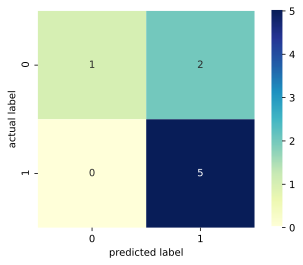

In [24]:
# accuracy score and confusion matrix of logistic regression
lr_eva = LogisticRegression(C=0.05).fit(X_train, Y_train)
grid_predictions = lr_eva.predict(X_test)

print(classification_report(Y_test, grid_predictions))

mat = confusion_matrix(Y_test, grid_predictions)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap="YlGnBu")

plt.xlabel('predicted label')
plt.ylabel('actual label');

Feature: 0, Score: 0.31215
Feature: 1, Score: 1.29157
Feature: 2, Score: 0.61539
Feature: 3, Score: 0.59559
Feature: 4, Score: 0.18488
Feature: 5, Score: 1.06631
Feature: 6, Score: 2.58880
Feature: 7, Score: 0.69571
Feature: 8, Score: 0.16344
Feature: 9, Score: 0.21855
Feature: 10, Score: 1.05759
Feature: 11, Score: 0.24728
Feature: 12, Score: 0.42588
Feature: 13, Score: 1.16699
Feature: 14, Score: 0.09108
Feature: 15, Score: 1.22407
Feature: 16, Score: 0.74505
Feature: 17, Score: 1.63182
Feature: 18, Score: 1.16606


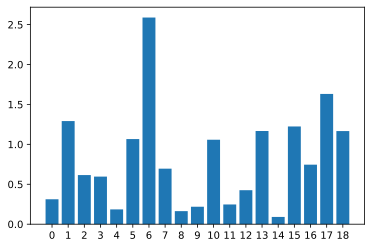

In [25]:
# find the most important predictor of logistic regression
lr.fit(X_train, Y_train)
importance = lr.coef_[0]
#print(importance)
#print(np.std(importance))
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,abs(v)/np.std(importance)))
# plot feature importance
#absolute values of the coefficients divided by their standard deviations.
plt.bar([x for x in range(len(importance))], abs(importance)/np.std(importance))
x=range(0,19,1)
plt.xticks(x)
plt.show()

Random Forest Classifier

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8



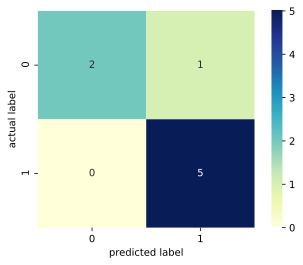

In [26]:
# accuracy score and confusion matrix of logistic regression
rfc_eva = RandomForestClassifier(max_features='sqrt',max_depth=10,n_estimators=100).fit(X_train, Y_train)
grid_predictions = rfc_eva.predict(X_test)

print(classification_report(Y_test, grid_predictions))

mat = confusion_matrix(Y_test, grid_predictions)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap="YlGnBu")

plt.xlabel('predicted label')
plt.ylabel('actual label');

Feature: 0, Score: 1.74230
Feature: 1, Score: 0.07037
Feature: 2, Score: 0.29358
Feature: 3, Score: 0.18652
Feature: 4, Score: 0.40262
Feature: 5, Score: 0.68817
Feature: 6, Score: 0.56568
Feature: 7, Score: 0.22741
Feature: 8, Score: 0.31291
Feature: 9, Score: 0.54866
Feature: 10, Score: 0.63941
Feature: 11, Score: 0.88994
Feature: 12, Score: 0.75972
Feature: 13, Score: 1.91780
Feature: 14, Score: 1.67537
Feature: 15, Score: 1.17399
Feature: 16, Score: 2.38427
Feature: 17, Score: 4.32828
Feature: 18, Score: 1.19893


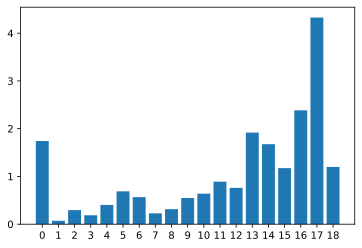

In [27]:
# find the most important predictor of random forest classifier
rfc.fit(X_train, Y_train)
importance = rfc.feature_importances_
#print(importance)
#print(np.std(importance))
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,abs(v)/np.std(importance)))
# plot feature importance
#absolute values of the coefficients divided by their standard deviations.
plt.bar([x for x in range(len(importance))], abs(importance)/np.std(importance)) 
x=range(0,19,1)
plt.xticks(x)
plt.show()

K Neighbors Classifier

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8



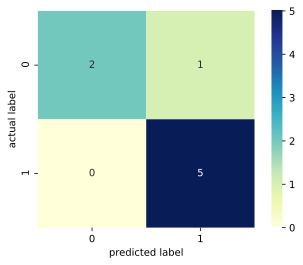

In [28]:
# accuracy score and confusion matrix of logistic regression
knn_eva = KNeighborsClassifier(leaf_size=5, metric= 'euclidean', n_neighbors=5).fit(X_train, Y_train)
grid_predictions = knn_eva.predict(X_test)

print(classification_report(Y_test, grid_predictions))

mat = confusion_matrix(Y_test, grid_predictions)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap="YlGnBu")

plt.xlabel('predicted label')
plt.ylabel('actual label');

Feature: 0, Score: 0.41630
Feature: 1, Score: 1.04076
Feature: 2, Score: 1.87336
Feature: 3, Score: 1.04076
Feature: 4, Score: 0.41630
Feature: 5, Score: 0.00000
Feature: 6, Score: 2.49781
Feature: 7, Score: 0.62445
Feature: 8, Score: 0.20815
Feature: 9, Score: 0.20815
Feature: 10, Score: 0.00000
Feature: 11, Score: 1.04076
Feature: 12, Score: 2.28966
Feature: 13, Score: 0.20815
Feature: 14, Score: 0.20815
Feature: 15, Score: 0.83260
Feature: 16, Score: 1.24891
Feature: 17, Score: 2.49781
Feature: 18, Score: 1.87336


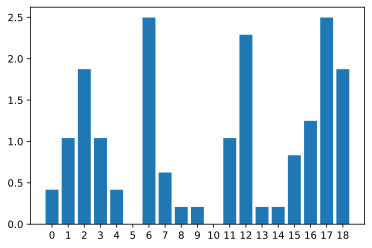

In [29]:
# find the most important predictor of k nearest neighborhood
from sklearn.inspection import permutation_importance
knn.fit(X_train, Y_train)
results = permutation_importance(knn, X_train, Y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,abs(v)/np.std(importance)))
# plot feature importance
#absolute values of the coefficients divided by their standard deviations.
plt.bar([x for x in range(len(importance))], abs(importance)/np.std(importance))
x=range(0,19,1)
plt.xticks(x)
plt.show()

## 8. Stability

We split the data again with different random_state. And we rerun all the code above with this new train and test sets and try to research the stability.

In [30]:
train_new, test_new = train_test_split(data,test_size=0.1,random_state=1)
train_scaled_new = std.fit_transform(train_new)
test_scaled_new = std.transform(test_new)
scaled_train_new = pd.DataFrame(train_scaled, columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE',
                            'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES',
                            'VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY'])
scaled_test_new = pd.DataFrame(test_scaled, columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE',
                            'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES',
                            'VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY'])
X_train_new = scaled_train_new.iloc[:, 1:]
Y_train_new = train_new.iloc[:, :1]

X_test_new = scaled_test_new.iloc[:, 1:]
Y_test_new = test_new.iloc[:, :1]

Y_test_new

,Class
121,2
43,2
52,2
130,2
82,2
84,2
96,2
138,1


Here we have the different test set compared with before

Logistic Regression with new train_test_split

In [31]:
grid_lr.fit(X_train_new, Y_train_new)
grid_lr.best_params_
print("Best accuracy:",grid_lr.best_score_)
print("Lowest Error Rate:",1-grid_lr.best_score_)

Best accuracy: 0.8357142857142856
Lowest Error Rate: 0.16428571428571437


Random Forest Classifier with new train_test_split\
Please also wait patiently as before, thanks

In [32]:
grid_rfc.fit(X_train_new, Y_train_new)
grid_rfc.best_params_
print("Best accuracy:",grid_rfc.best_score_)
print("Lowest Error Rate:",1-grid_rfc.best_score_)

Best accuracy: 0.5291666666666667
Lowest Error Rate: 0.4708333333333333


K Nearest Classifier with new train_test_split

In [33]:
grid_knn.fit(X_train_new, Y_train_new)
print("Best parameters:",grid_knn.best_params_)
print("Best accuracy:",grid_knn.best_score_)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Best parameters: {'leaf_size': 5, 'metric': 'euclidean', 'n_neighbors': 7}
Best accuracy: 0.8357142857142856


## 9. Conclusion

1. About the accuracy rank of these three model with different split method: \
After running all the code for two times with different train and test set, we can find that the accuracy rank between these three models changes. This means that based on this hepetitis model, we cannot see which model performs better and which one is worse. It depends on how the training set and test set are splitted.
2. About the accuracy in this noteboook compared with that in the paper: \
Compared with the paper, the accuracy obtained in this notebook is on average higher. But this is also easy to understand. In the process of data cleaning, the method I choose is to discard all data sets with missing values. The advantage of doing this is to avoid the bias by approximating the missing value and effectively improve accuracy. Of course, the disadvantage of doing so is also obvious. We discarded more data, making the number of data in the test set smaller, which increased some uncertainty. In order to verify whether this uncertainty really caused a large deviation, I will verify it based on the content of the paper below.
3. About the stability of these models: \
As we can see, for the data splitting with randomstate=0, the accuracy of random forest classifier
4. Some other conclusions beyond the model: \
You can find these conclusions in part 1 below every plot.

## 10. Something more beyond the instruction of this assignment

As I write in conclusion 2, according to the paper, I will run the model for 100 times in order to test the uncertainty of my code above.The code is nearly the same as above. I just add a loop of 100 times and calculate the average accuracy.\
Notice that this is the additional part of this assignment. If you would like to continue, it will takes for a very long time to run this code(5 minutes for the first one and more than 2 hours for the second one. It depends on your device.). Please wait patiently again. 

Logistic Regression

In [34]:
from sklearn.metrics import accuracy_score

accuracy_lr = list(range(100));

lr = LogisticRegression()
parameters_lr = {'C': (5e-3, 1e-2, 5e-2, 1e-1,5e-1,1,2,3,4,5,7,10,20,50, 100, 200)}
grid_lr = GridSearchCV(lr, parameters_lr, verbose=0, scoring='accuracy', cv=10)

# As mentioned in the paper, we run this code for 100 times.
for i in range(100):    
    train, test = train_test_split(data,test_size=0.1)    
    train_scaled = std.fit_transform(train)
    test_scaled = std.transform(test)
    scaled_train = pd.DataFrame(train_scaled, columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE',
                            'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES',
                            'VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY'])
    scaled_test = pd.DataFrame(test_scaled, columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE',
                            'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES',
                            'VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY'])
    X_train = scaled_train.iloc[:, 1:]
    Y_train = train.iloc[:, :1]
    X_test = scaled_test.iloc[:, 1:]
    Y_test = test.iloc[:, :1]
    grid_lr.fit(X_train, Y_train)
    
    lr = LogisticRegression(C=grid_lr.best_params_['C']).fit(X_train, Y_train)  
    prediction = lr.predict(X_test)
    accuracy_lr[i]= accuracy_score(prediction,Y_test)

print("accuracy",accuracy_lr)
print("mean accuracy:",np.mean(accuracy_lr))

accuracy [1.0, 0.875, 0.875, 0.875, 0.75, 1.0, 0.875, 0.875, 0.875, 0.75, 1.0, 0.875, 0.75, 1.0, 0.5, 0.875, 0.875, 1.0, 0.875, 0.625, 0.875, 0.625, 0.875, 0.75, 0.75, 0.75, 1.0, 0.875, 0.875, 1.0, 0.875, 0.875, 0.875, 1.0, 0.75, 0.875, 0.875, 0.75, 0.75, 0.75, 1.0, 0.875, 1.0, 0.875, 1.0, 1.0, 1.0, 0.75, 0.75, 0.75, 0.875, 0.75, 0.75, 0.875, 0.75, 0.875, 0.75, 1.0, 0.875, 0.875, 0.75, 1.0, 0.75, 0.75, 0.75, 1.0, 1.0, 0.875, 0.75, 1.0, 0.75, 1.0, 0.75, 0.875, 1.0, 0.75, 0.875, 0.875, 1.0, 0.875, 0.75, 1.0, 0.875, 0.625, 0.875, 0.875, 0.875, 1.0, 1.0, 0.875, 0.75, 1.0, 0.75, 0.875, 0.875, 1.0, 0.875, 1.0, 0.75, 0.75]
mean accuracy: 0.86


Random Forest

In [35]:
accuracy_rfc = list(range(100));

for i in range(100):    
    train, test = train_test_split(data,test_size=0.1)  
    train_scaled = std.fit_transform(train)
    test_scaled = std.transform(test)
    scaled_train = pd.DataFrame(train_scaled, columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE',
                            'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES',
                            'VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY'])
    scaled_test = pd.DataFrame(test_scaled, columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE',
                            'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES',
                            'VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY'])
    X_train = scaled_train.iloc[:, 1:]
    Y_train = train.iloc[:, :1]
    X_test = scaled_test.iloc[:, 1:]
    Y_test = test.iloc[:, :1]
    
    rfc = RandomForestClassifier()

    parameters_rfc = {'n_estimators': [10, 20, 50, 80, 100, 150, 200, 300],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [2,3,4,5,6,7,8,9,10]}

    grid_rfc = GridSearchCV(estimator=rfc, param_grid=parameters_rfc, cv= 10, scoring = 'roc_auc', n_jobs=1)
    grid_rfc.fit(X_train, Y_train)
    accuracy_rfc[i]= grid_rfc.best_score_
    
print("accuracy:",accuracy_rfc)
print("mean accuracy:",np.mean(accuracy_rfc))

KeyboardInterrupt: 

We can find that after running for 100 times, the average accuracy is very close to the accuracy given in the paper, but it is always slightly larger than that in the paper. Perhaps the calculation of the result in the paper applied different data cleaning methods, which caused the deviation of the results. \
Also, compared the result in part 4 and 5, we can find that even if the test set is small, the accuracy deviation caused by this is not big. This anwsers my question in conclusion 2